In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from datetime import datetime
from statsmodels.stats.proportion import proportions_ztest

%matplotlib inline

In [2]:
# Load data
PATH = '/Users/Lisa/Thinkful_Data_Science_Projects/Module 14/experiment_data_2_wks.csv'
experiment_data = pd.read_csv(PATH)

In [3]:
# Look at data
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


1. treatment_date shows the date of the email being sent.
2. test is a binary indicator if they were in test or control.
3. is_signed_up shows if they successfully signed up.
4. signup_date is the date of signup

In [4]:
# How large is each group?
group0 = experiment_data['test'].value_counts()[0]
group1 = experiment_data['test'].value_counts()[1]
print('There are {} individuals in the control group and {} individuals in the test group.'.format(group0, group1))

There are 30241 individuals in the control group and 3372 individuals in the test group.


In [5]:
# How large is each group?
print('test sample size:', len(experiment_data[experiment_data.test == 1]))
print('control sample size:', len(experiment_data[experiment_data.test == 0]))
print('test proportion:', experiment_data.test.mean())
print()

test sample size: 3372
control sample size: 30241
test proportion: 0.10031832921786214



In [6]:
# What is the signup rate of test and control?
ctrl_no = experiment_data[experiment_data['test'] == 0]['is_signed_up'].value_counts()[0]
ctrl_yes = experiment_data[experiment_data['test'] == 0]['is_signed_up'].value_counts()[1]
ctrl_rate = ctrl_yes / (ctrl_yes + ctrl_no)

test_no = experiment_data[experiment_data['test'] == 1]['is_signed_up'].value_counts()[0]
test_yes = experiment_data[experiment_data['test'] == 1]['is_signed_up'].value_counts()[1]
test_rate = test_yes / (test_yes + test_no)

print('The signup rate for control is {}.\nThe signup rate for test is {}.'.format(ctrl_rate, test_rate))

The signup rate for control is 0.14708508316523924.
The signup rate for test is 0.13701067615658363.


In [7]:
# What is the signup rate of test and control?
print('test signup rate:', experiment_data[experiment_data.test == 1].is_signed_up.mean())
print('control signup rate:', experiment_data[experiment_data.test == 0].is_signed_up.mean())

test signup rate: 0.13701067615658363
control signup rate: 0.14708508316523924


In [8]:
# Is the experiment already significant?
stats.ttest_ind(experiment_data[experiment_data['test'] == 1]['is_signed_up'],
                experiment_data[experiment_data['test'] == 0]['is_signed_up'])

Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

In [9]:
# Are the test and control groups significantly different?
stats.ttest_ind(experiment_data[experiment_data.test == 1].is_signed_up,
                experiment_data[experiment_data.test == 0].is_signed_up)

Ttest_indResult(statistic=-1.5711354292574262, pvalue=0.11616060761145311)

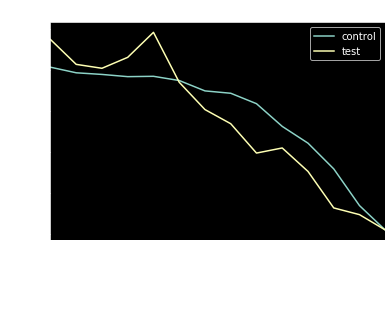

T-Test Results by Date
Ttest_indResult(statistic=1.171015382328547, pvalue=0.24172432121696255)
Ttest_indResult(statistic=0.39163213374090855, pvalue=0.6953630758340448)
Ttest_indResult(statistic=0.24114731791032132, pvalue=0.8094651742723448)
Ttest_indResult(statistic=1.006146671265253, pvalue=0.3144281887767212)
Ttest_indResult(statistic=1.7950152227404037, pvalue=0.0727950243234006)
Ttest_indResult(statistic=-0.07142256949339083, pvalue=0.9430681183812821)
Ttest_indResult(statistic=-0.99645401324533, pvalue=0.31911047625459077)
Ttest_indResult(statistic=-1.4059315672051254, pvalue=0.1598930922410899)
Ttest_indResult(statistic=-2.772772511643487, pvalue=0.0055926512303104605)
Ttest_indResult(statistic=-1.301097855458891, pvalue=0.19332775805677105)
Ttest_indResult(statistic=-1.6243695706046337, pvalue=0.10443285596458776)
Ttest_indResult(statistic=-2.559540254853317, pvalue=0.010550250694229046)
Ttest_indResult(statistic=-0.851793126290792, pvalue=0.3944212121535955)
Ttest_indResult(

In [10]:
# The test signup rate seems lower than the old message. Can you see any reason why?
fig1 = experiment_data[experiment_data['test'] == 0][['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data['test'] == 1][['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig1)
plt.legend(['control', 'test'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.ylabel('Signup Rate')
plt.xticks(rotation=45)
plt.show()

# Generate a test statistic comparing test and control on treatment date
print('T-Test Results by Date')
for date in experiment_data['treatment_date'].unique():
    dated_data = experiment_data[experiment_data['treatment_date'] == date]
    print(stats.ttest_ind(dated_data[dated_data['test'] == 1]['is_signed_up'],
                          dated_data[dated_data['test'] == 0]['is_signed_up']))



Right. So what you see is that the test group is converting slower than the control group. But if you look just at the group treated in the first few days, they're not that different in signup rate. The rates seem to converge as time passes after sending the email.

This means the difference could be a time effect rather than a rate effect. Time plays a huge role in almost all experiments. Not all behaviors are immediate. Sometimes it takes a while to figure out a new feature. Other times there is novelty effect from the new feature that leads to a spike in activity. Letting these things play out is an inexact, but important, feature of experimental design.

In [11]:
# Load data
PATH = '/Users/Lisa/Thinkful_Data_Science_Projects/Module 14/experiment_data_final.csv'
experiment_final = pd.read_csv(PATH)

In [12]:
# How large is each group?
print('control sample size:', len(experiment_final[experiment_final['test'] == 0]))
print('test sample size:', len(experiment_final[experiment_final['test'] == 1]))
print('test proportion:', experiment_final['test'].mean())
print()

# What is the signup rate of test and control?
print('control signup rate:', experiment_final[experiment_final['test'] == 0]['is_signed_up'].mean())
print('test signup rate:', experiment_final[experiment_final['test'] == 1]['is_signed_up'].mean())
print()

# Is the experiment already significant?
stats.ttest_ind(experiment_final[experiment_final['test'] == 1]['is_signed_up'],
                experiment_final[experiment_final['test'] == 0]['is_signed_up'])

control sample size: 46867
test sample size: 19861
test proportion: 0.2976411701234864

control signup rate: 0.19937269293959503
test signup rate: 0.2421328231206888



Ttest_indResult(statistic=12.368130184147793, pvalue=4.248167714911685e-35)

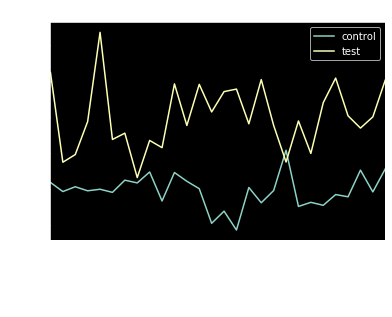

In [13]:
# Create some visualizations to tell the story of the effect of the new email
fig2 = experiment_final[experiment_final['test'] == 0][['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_final[experiment_final['test'] == 1][['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig2)
plt.legend(['control', 'test'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.ylabel('Signup Rate')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Check format of columns in data frame
experiment_final.info()

# Remove rows where 'signup_date' is 'NaN'
experiment_filter = experiment_final[experiment_final['signup_date'].str.contains('NaN') == False]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66728 entries, 0 to 66727
Data columns (total 4 columns):
treatment_date    66728 non-null object
test              66728 non-null int64
is_signed_up      66728 non-null int64
signup_date       14153 non-null object
dtypes: int64(2), object(2)
memory usage: 2.0+ MB


In [15]:
# Convert 'treatment_date' and 'signup_date' columns to datetime format
experiment_filter['treatment_date_dt'] = pd.to_datetime(experiment_filter['treatment_date'])
experiment_filter['signup_date_dt'] = pd.to_datetime(experiment_filter['signup_date'])

# Check format of columns
experiment_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14153 entries, 6 to 66726
Data columns (total 6 columns):
treatment_date       14153 non-null object
test                 14153 non-null int64
is_signed_up         14153 non-null int64
signup_date          14153 non-null object
treatment_date_dt    14153 non-null datetime64[ns]
signup_date_dt       14153 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 774.0+ KB
/Users/Lisa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Lisa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [16]:
# Calculate 'conversion_time'
experiment_filter['conversion_time'] = experiment_filter['signup_date_dt'] - experiment_filter['treatment_date_dt']

# Convert 'conversion_time' to integer
experiment_filter['conversion_time'] = pd.to_numeric(experiment_filter['conversion_time'].dt.days, downcast='integer')

# Look at data frame
experiment_filter.head()

/Users/Lisa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Lisa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,treatment_date,test,is_signed_up,signup_date,treatment_date_dt,signup_date_dt,conversion_time
6,2016-04-01,1,1,2016-04-02,2016-04-01,2016-04-02,1
29,2016-04-01,0,1,2016-04-02,2016-04-01,2016-04-02,1
35,2016-04-01,0,1,2016-04-03,2016-04-01,2016-04-03,2
36,2016-04-01,0,1,2016-04-05,2016-04-01,2016-04-05,4
37,2016-04-01,0,1,2016-04-05,2016-04-01,2016-04-05,4


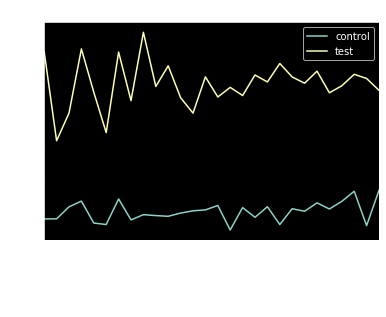

In [17]:
# Compare conversion times for test and control
fig3 = experiment_filter[experiment_filter['test'] == 0][['treatment_date', 'conversion_time']].groupby('treatment_date').mean().plot()
experiment_filter[experiment_filter['test'] == 1][['treatment_date', 'conversion_time']].groupby('treatment_date').mean().plot(ax=fig3)
plt.legend(['control', 'test'])
plt.title('Comparing Conversion Times by Treatment Date')
plt.ylabel('Conversion Time in Days')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Use statsmodels to compare two proportions for experiment_data
count = np.array([test_yes, ctrl_yes])
nobs = np.array([group1, group0])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

# Use statsmodels to compare two proportions for experiment_final
group0_final = experiment_final['test'].value_counts()[0]
group1_final = experiment_final['test'].value_counts()[1]

ctrl_yes_final = experiment_final[experiment_final['test'] == 0]['is_signed_up'].value_counts()[1]
test_yes_final = experiment_final[experiment_final['test'] == 1]['is_signed_up'].value_counts()[1]

count_final = np.array([test_yes_final, ctrl_yes_final])
nobs_final = np.array([group1_final, group0_final])
stat, pval = proportions_ztest(count_final, nobs_final)
print(stat, pval)

-1.571124480864239 0.1161537372061699
12.354162568395353 4.625476886928066e-35
